<a href="https://colab.research.google.com/github/hkbharath/ComputerVision/blob/main/CVAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#fetch all necessary imports
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

**TASK A** - PCA for Image reconstruction



1. In the below code `compute_pca` calculates principal components for 16x16 non-overlapping patches from the image https://pixabay.com/photos/forest-path-trees-leaves-fog-5724397/. And tries to reconstruct the image with `k=10` and `k=100`, where `k` is the number of principal components, in order of experienced varience, used for reconstruction of the image. Reconstructed image will be saved as `forest_R10.jpg` for `k=10` and `forest_R100.jpg` for `k=100` in the folder specifed in the variable `image_folder`.

2. Function `plot_components` plots the first 10 principle components calculated from PCA in the previous. Each component is saved as `16x16` JPG image format with name `forest_PC<component number>.jpg`, where `<component number>` is numbered in the order based on variance along that principal component. So, `forest_PC1.jpg` is the image correspronding to first principal component and so on.




In [2]:
# Function to break the images to small 16x16 patches
def create_patches(orig_img, chunk_size):
  h_idx=0
  w_idx=0
  image_chunks = []
  (img_h, img_w) = orig_img.shape

  while h_idx < img_h:
    w_idx = 0
    while w_idx < img_w:
      chunk = orig_img[h_idx:min(h_idx+chunk_size[0], img_h), 
                      w_idx:min(w_idx+chunk_size[1], img_w)]
      image_chunks.append(np.array(chunk, dtype=np.uint8).flatten())
      w_idx = w_idx+chunk_size[1]
    h_idx = h_idx+chunk_size[0]

  return image_chunks

# Function to combine the small 16x16 patches to reconstruct the image
def combine_patches(image_chunks, img_h, img_w, chunk_size):
  img_rec = np.zeros((img_h, img_w))
  h_idx = 0
  w_idx = 0
  chunk_idx = 0

  while h_idx < img_h:
    w_idx = 0
    while w_idx < img_w:
      chunk_rec_img = np.reshape(image_chunks[chunk_idx], [chunk_size[0], chunk_size[1]])
      img_rec[h_idx:min(h_idx+chunk_size[0], img_h), 
              w_idx:min(w_idx+chunk_size[1], img_w)] = chunk_rec_img
      chunk_idx = chunk_idx+1;
      w_idx = w_idx+chunk_size[1]
    h_idx = h_idx+chunk_size[0]

  return img_rec

#Function to recreate a the image using k principal components
def compute_pca(img_data, chunk_size, k=100):
  (img_h, img_w) = img_data.shape

  #break the image intp 16x16 patches
  image_chunks = create_patches(img_data, chunk_size)

  #Calculate PCA
  pca = PCA(n_components=k)
  img_pca = pca.fit_transform(image_chunks)
  img_trans = pca.inverse_transform(img_pca)

  #size verification
  # print("Original size:", end=' ')
  # print(rgb_data.shape)

  # print("chunk array size:", end=' ')
  # print(np.array(image_chunks).shape)

  # print("PCA Trasnform size:", end=' ')
  # print(img_pca.shape)

  #reconstruct the image
  img_rec = combine_patches(img_trans, img_h, img_w, chunk_size)

  # print("Shape of the principal component: ", end="")
  # print(pca.components_[0].shape)
  return (img_rec, pca.components_[:10])

#Function to plot the principal components calculated for an image
def plot_components(pca_comps, image_folder):
  plt.figure(figsize=(16,4))
  is_title_added = False
  #fig, axes = plt.subplots(1,10,figsize=(16,16),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))
  for i,pca_comp in enumerate(pca_comps):
    plt.subplot(1, 10, i+1);
    plt.imshow(pca_comps[i].reshape(16,16),cmap="gray")
    if not is_title_added:
      plt.title("First %d principal components"%(len(pca_comps)))
      is_title_added = True
    #save Image
    #pca_img = cv2.convertScaleAbs(pca_comps[i].reshape(16,16), alpha=(255.0))
    # pca_img = np.pca_comps[i].reshape(16,16)*255
    # print(pca_comps[i].reshape(16,16))
    #cv2.imwrite(os.path.join(image_folder, "forest_PC%d.jpg"%(i+1)), pca_img)
    plt.imsave(os.path.join(image_folder, "forest_PC%d.jpg"%(i+1)), pca_comps[i].reshape(16,16), cmap="gray")

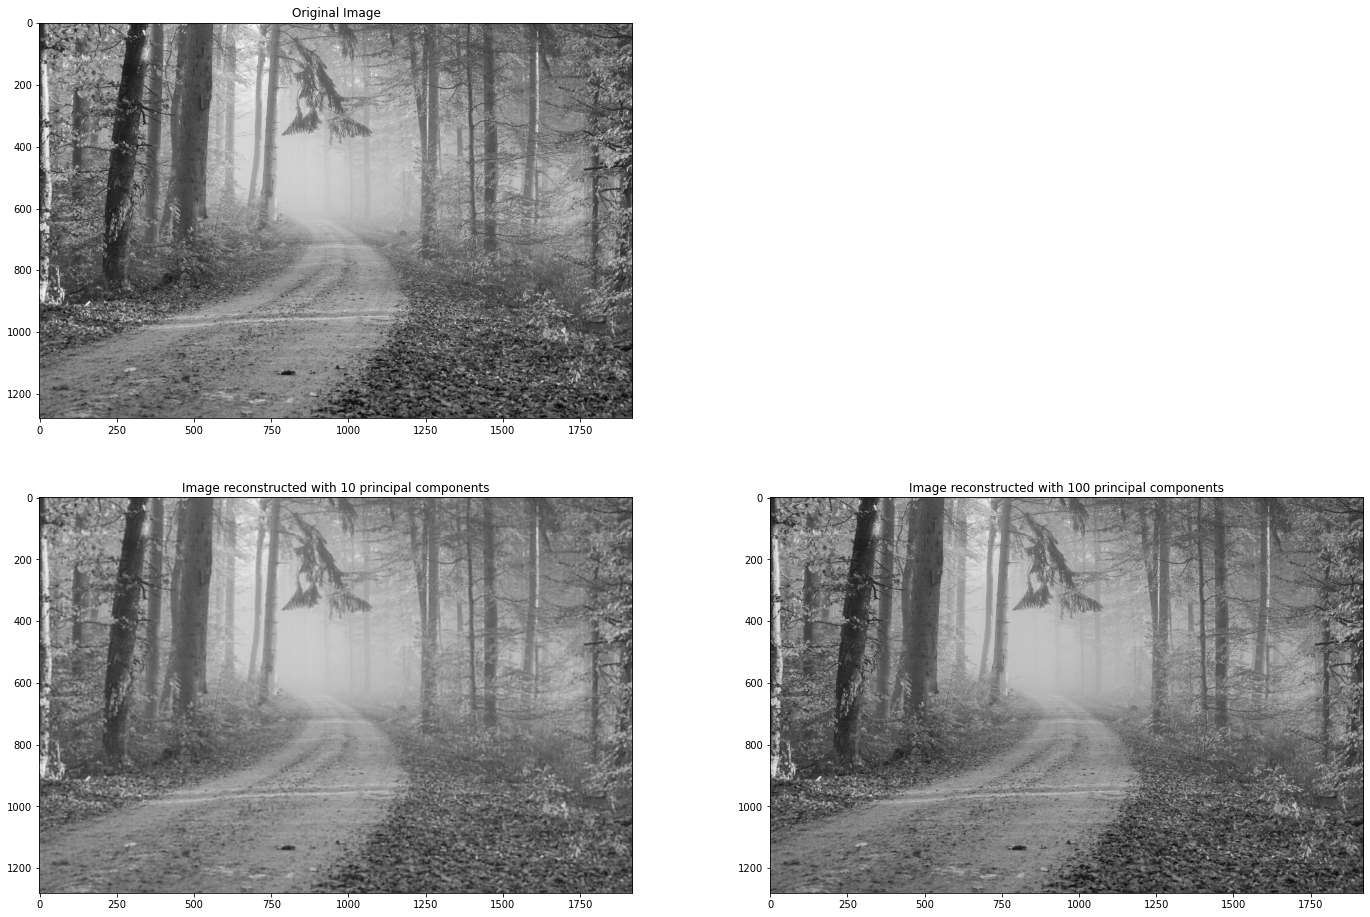

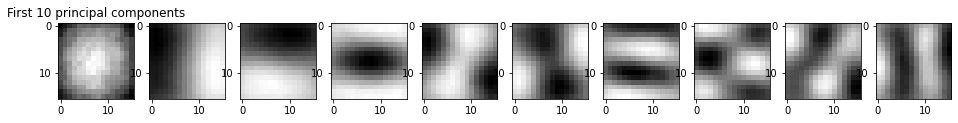

In [3]:
# Magic of PCA starts here 

image_folder = "/content/drive/My Drive/TCDMSc/Computer Vision/Mid-Term Assignment/"
image_file = os.path.join(image_folder, "forest-5724397_1920.jpg")
raw_data = cv2.imread(image_file)
gray_img = cv2.cvtColor(raw_data, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(24,16))
plt.subplot(2,2,1);
plt.imshow(gray_img,cmap="gray");
plt.title("Original Image")

chunk_size = [16,16]
k_list = [10, 100]
pca_img_ist = []
pca_comps = None

for i,k in enumerate(k_list):
  pca_img,pca_comps = compute_pca(gray_img, chunk_size, k=k)
  pca_img_ist.append(pca_img)

  plt.subplot(2, 2, i+3);
  plt.imshow(pca_img,cmap="gray")
  plt.title("Image reconstructed with %d principal components"%(k))

  #save Image
  cv2.imwrite(os.path.join(image_folder, "forest_R%d.jpg"%(k)), pca_img)

if pca_comps is not None:
  plot_components(pca_comps, image_folder)

3. Best `k` can be selected based on accuracy requiremnts of the reconstrcuted image. We can plot the graph of cummulative sum of variance ratios achived with increasing the number of principal components. Graph *Cumulative Variance plotted against Function of the Number of Components*, plotted below shows that for the selected forest image, we can reconstruct this image with 97% accuracy using only 136 principal components. Reconstructed image using `k=136` has been saved with name `forest_R136.jpg` in the folder selected in `image_folder` before.

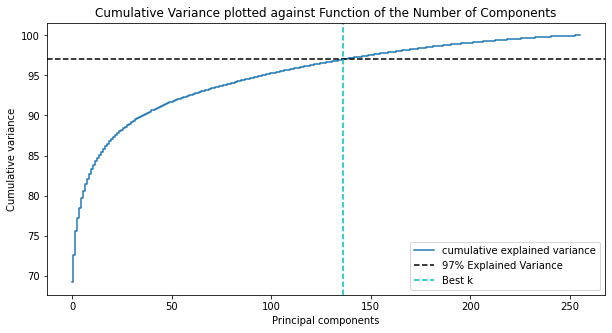

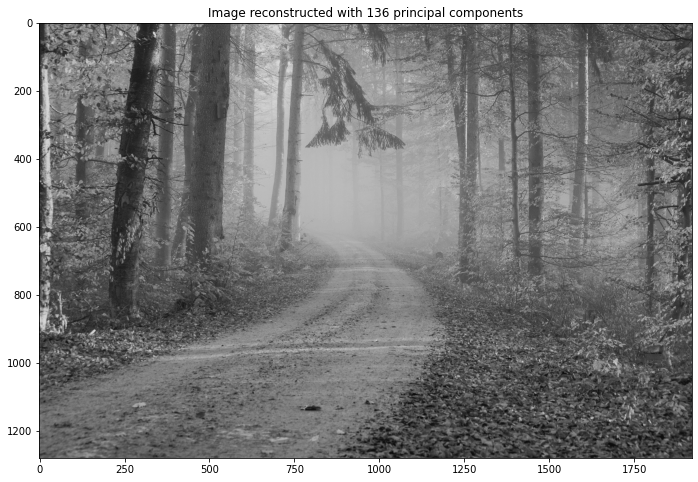

In [4]:
def find_best_k(img_data, chunk_size):
  (img_h, img_w) = img_data.shape

  #break the image intp 16x16 patches
  image_chunks = create_patches(img_data, chunk_size)

  #Calculate PCA
  pca = PCA()
  img_pca = pca.fit_transform(image_chunks)

  tv = sum(pca.explained_variance_)
  var_percent = [(evar/tv)*100 for evar in sorted(pca.explained_variance_, reverse=True)]

  cum_var = np.cumsum(var_percent)

  plt.figure(figsize=(10, 5))
  plt.step(range(0, chunk_size[0]*chunk_size[1]), cum_var, where='mid',label='cumulative explained variance')
  plt.title('Cumulative Variance plotted against Function of the Number of Components')
  plt.ylabel('Cumulative variance')
  plt.xlabel('Principal components')
  plt.axhline(y = 97, color='k', linestyle='--', label = '97% Explained Variance')
  plt.axvline(x = 136, color='c', linestyle='--', label = 'Best k')
  plt.legend(loc='best')
  plt.show()

find_best_k(gray_img, chunk_size);

best_k = 136;
plt.figure(figsize=(12,8));
#selected best k = 136 to recontruct original image with 97% accuracy.
pca_img_best,_ = compute_pca(gray_img, chunk_size, k=best_k);

plt.imshow(pca_img_best,cmap="gray");
plt.title("Image reconstructed with %d principal components"%(best_k));

#save Image
cv2.imwrite(os.path.join(image_folder, "forest_R%d.jpg"%(best_k)), pca_img_best);

4. Image reconstructed with `k=10`, context of the scene is visble but the image is out of focus and looks pixelated. Also it doesn't contains the details of the elemnts compared to the orginal image. Image reconstructed with with `k=100` and `k=136` are very similar to the original image. Difference is almost not visible to nacked eye.